### Обучение без учителя
##### Задание 1

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

%config InlineBackend.firuge_format = "svg"
%matplotlib inline

In [61]:
# загружаем данные из стандартных датасетов библиотеке sklearn, разбиваем эти данные
#на тренировочные и валидационные выборки и делаем их масштабирование с помощью StandartScaler
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE


boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


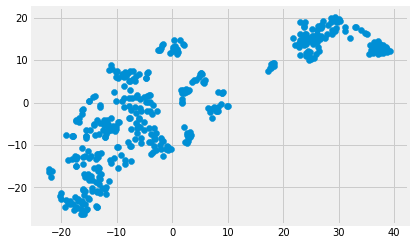

In [68]:
#строим модель TSNE 
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

##### Задание 2

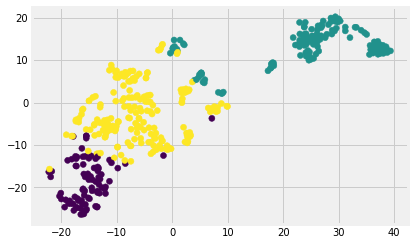

In [104]:
# на полученных данные построим модель кластеризации с помощью модели KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [114]:
# вычислим средние значения price и CRIM в разных кластерах
print(f"Среднее значение price в первом кластере:{y_train[labels_train == 0].mean()}\n")
print(f"Среднее значение price во втором кластере:{y_train[labels_train == 1].mean()}\n")
print(f"Среднее значение price в третьем кластере:{y_train[labels_train == 2].mean()}\n")
print(f"Среднее значение CRIM в первом кластере:{X_train['CRIM'][labels_train == 0].mean()}\n")
print(f"Среднее значение CRIM во втором кластере:{X_train['CRIM'][labels_train == 1].mean()}\n")
print(f"Среднее значение CRIM в третьем кластере:{X_train['CRIM'][labels_train == 2].mean()}\n")

Среднее значение price в первом кластере:27.78837209302326

Среднее значение price во втором кластере:16.165354330708663

Среднее значение price в третьем кластере:24.958115183246072

Среднее значение CRIM в первом кластере:0.07356558139534884

Среднее значение CRIM во втором кластере:10.797028425196851

Среднее значение CRIM в третьем кластере:0.4216602094240837



##### Задание 3*

In [124]:
# применяем модель KMeans построенную в предыдущем задании к тестовому набору данных
# посчитать средния значения price и CRIM в разных кластерах для тестовых данных
labels_train = kmeans.predict(X_test_scaled)
print(f"Среднее значение price в первом кластере:{y_test[labels_test == 0].mean()}\n")
print(f"Среднее значение price во втором кластере:{y_test[labels_test == 1].mean()}\n")
print(f"Среднее значение price в третьем кластере:{y_test[labels_test == 2].mean()}\n")
print(f"Среднее значение CRIM в первом кластере:{X_test['CRIM'][labels_test == 0].mean()}\n")
print(f"Среднее значение CRIM во втором кластере:{X_test['CRIM'][labels_test == 1].mean()}\n")
print(f"Среднее значение CRIM в третьем кластере:{X_test['CRIM'][labels_test == 2].mean()}\n")

Среднее значение price в первом кластере:28.413636363636364

Среднее значение price во втором кластере:16.43714285714286

Среднее значение price в третьем кластере:22.031111111111112

Среднее значение CRIM в первом кластере:0.07985181818181818

Среднее значение CRIM во втором кластере:10.165531142857143

Среднее значение CRIM в третьем кластере:0.2845831111111111

